# <center>D2TEC - TECNOLOGIAS DE BIG DATA (2S2022)</center>

## <center>PROJETO FINAL</center>

### <br>Tema: Análise de dados utilizando AWS EMR.
<br><br>

> Aluno: Halisson Gomides (CP3016382)<br>
> Profª Bianca<br>
> *Campinas, 21 de novembro de 2022.*

## 1. Introdução

&nbsp;&nbsp;&nbsp;&nbsp;A análise de dados permite que as organizações tomem decisões, prevejam receitas, diagnostiquem problemas, controlem processos e construam produtos melhores. Manipular dados para alcançar tais objetivos nem sempre é simples, especialmente quando o volume de dados é grande, os recursos são poucos e os custos associados devem ser mínimos.

&nbsp;&nbsp;&nbsp;&nbsp;Este projeto apresenta uma abordagem para processar e orquestrar com eficiência grandes conjunto de dados, a partir da aplicação de técnicas de engenharia de dados utilizando ferramentas disponíveis na plataforma de computação em nuvem da _Amazon Web Services_ (AWS), com foco no processamento distribuído (em cluster) e recursos de paralelismo na análise de dados.

&nbsp;&nbsp;&nbsp;&nbsp;Para tanto, o projeto foi implementado utilizando a solução de Big Data da AWS denominada <u>**Amazon Elastic MapReduce (EMR)**</u>.

&nbsp;&nbsp;&nbsp;&nbsp;O Amazon EMR é uma plataforma de cluster gerenciada que pode executar estruturas de big data, como Apache Hadoop e Apache Spark, na Amazon Web Services (AWS), que suporta o processamento de grande volume de dados em um ambiente de computação distribuída.



## 2. Descrição do conjunto de dados (dataset)

Este conjunto de dados (dataset) [Diamond Price](https://www.kaggle.com/datasets/shivam2503/diamonds) contém os preços e outros atributos de quase 54.000 diamantes. Existem 10 atributos no conjunto de dados, incluindo o preço.


### 2.1 Informações dos atributos

- **price** – preço em US dolar. Essa é a variável _target_ utilizada em trabalhos de aprendizado supervisionado de _machine learning_. As avaliações dos preços dos diamantes foram realizadas a cerca de 5 anos atrás. Variável numérica contínua.

**Os 4 C´s dos Diamantes**:

- **carat** – O quilate. É o peso físico do diamante medido em quilates métricos. Um quilate equivale a 1/5 grama e é subdividido em 100 pontos. O peso em quilates é a graduação mais objetiva dos 4 Cs. Variável numérica contínua.
- **cut** - Qualidade do Corte (Fair, Good, Very Good, Premium, Ideal). Ao determinar a qualidade do corte, o classificador de diamantes avalia a habilidade do cortador na modelagem do diamante. Quanto mais preciso o diamante é cortado, mais cativante o diamante é para os olhos. Variável categórica ordinal.
- **color** – Cor. A cor dos diamantes com qualidade de gema ocorre em vários tons. Na faixa de incolor a amarelo claro ou marrom claro. Os diamantes incolores são mais raros. Outras cores natuais (azul, vermelho, rosa, por exemplo) são conhecidas como "fantasias" e sua classificação de cores é diferente dos diamantes brancos incolores. Vai de J (pior) a D (melhor). Variável categórica ordinal.
- **clarity** – Claridade. Os diamantes pode ter características internas conhecidas como inclusões ou características externas conhecidas como manchas. Diamantes sem inclusões ou manchas são raros; no entanto, a maioria das características só pode ser vista com ampliação. (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor)). Variável categórica ordinal.

**Dimensões**
- **x** – Comprimento em (mm). Variável numérica contínua.
- **y** – Largura em (mm). Variável numérica contínua.
- **z** – Profundidade em (mm). Variável numérica contínua.
- **depth** - % de profundidade total. A profundidade do diamante é a sua altura (em milímetros) medida do culet (ponta inferior) até a mesa (superfície plana, superior). Para chegar no percentual, esse valor é dividido pelo diâmetro médio da cintura. Variável numérica contínua.
- **table** – Largura da mesa do topo do diamante em relação ao ponto mais largo. A mesa de um diamante refere-se à faceta plana do diamante vista quando a pedra está virada para cima. O principal objetivo de uma mesa de diamante é refratar os raios de luz que entram e permitir que os raios de luz refletidos de dentro do diamante encontrem o olho do observador. Variável numérica contínua.


<img src="imgs/diamond_dims.png"/>

### 2.2 Atribuições do conjunto de dados (dataset)

Esse conjunto de dados (dataset) foi obtido de:
Shivam Agrawal (2017). Kaggle’s community (https://www.kaggle.com/).

### 2.3 Amostra dos dados

| # | carat | cut     | color | clarity | depth | table | price | x    | y    | z    |
|---|-------|---------|-------|---------|-------|-------|-------|------|------|------|
| 1 | 0.23  | Ideal   | E     | SI2     | 61.5  | 55.0  | 326   | 3.95 | 3.98 | 2.43 |
| 2 | 0.21  | Premium | E     | SI1     | 59.8  | 61.0  | 326   | 3.89 | 3.84 | 2.31 |
| 3 | 0.23  | Good    | E     | VS1     | 56.9  | 65.0  | 327   | 4.05 | 4.07 | 2.31 |
| 4 | 0.29  | Premium | I     | VS2     | 62.4  | 58.0  | 334   | 4.20 | 4.23 | 2.63 |
| 5 | 0.31  | Good    | J     | SI2     | 63.3  | 58.0  | 335   | 4.34 | 4.35 | 2.75 |

## 3. Diagrama de Arquitetura

FERRAMENTAS E ORDEM DAS OPERAÇÕES NO AWS
<img src="imgs/arquitetura-d2tec-final.png"/>


## 4. Infraestrutura

#### 4.1.1 Etapas de preparação para o Amazon EMR:

1.   Foi criado um Bucket no Amazon S3, denominado: `d2tec-final-bucket`
2.   Foi feito upload de arquivo CSV contendo os dados crus `diamonds.csv` para o referido bucket do S3 (URI: `s3://d2tec-final-bucket/raw/`).
3.  Foi criado um par de chaves do Amazon EC2 para o SSH.


#### <br>4.1.2 Etapas de Criação e configuração de Cluster EMR:

**1. Aplicações escolhidas para integrar o Cluster:**
  - **Apache Hadoop**: O Apache Hadoop é uma estrutura de software Java de código aberto compatível com processamento de dados em massa por todo um cluster de instâncias. Ele também pode ser executado em uma única instância ou em milhares de instâncias. O Hadoop usa vários modelos de processamento, como MapReduce e Tez, para distribuir o processamento em várias instâncias e também usa um sistema de arquivos distribuído chamado HDFS para armazenar dados em várias instâncias. O Hadoop monitora a integridade das instâncias no cluster e pode fazer a recuperação de falha em um ou mais nós. Dessa maneira, o Hadoop proporciona o aumento do processamento e da capacidade de armazenamento, bem como a alta disponibilidade.
  <img src="imgs/info_hadoop.png"/>

  - **Apache Hive**:   Hive é um data warehouse e um pacote de análises de código aberto executado além de um cluster do Hadoop. Os scripts do Hive usam uma linguagem semelhante a SQL chamada Hive QL (query language, linguagem de consulta) que abstrai modelos de programação e dá suporte a interações de data warehouse típicas. O Hive permite que você evite as complexidades de escrever trabalhos Tez com base em gráficos acíclicos direcionados (DAGs) ou MapReduce programas em uma linguagem de computador de nível inferior, como Java.
<img src="imgs/info_hive.png"/>

  - **Apache Spark**: O Apache Spark é uma estrutura de processamento distribuída e um modelo de programação que ajuda você a fazer aprendizado de máquina, processamento de streams ou análises gráficas usando clusters do Amazon EMR. Semelhante ao Apache Hadoop, o Spark é um sistema de processamento distribuído de código-fonte aberto comumente utilizado para cargas de trabalho Big Data. No entanto, o Spark tem várias diferenças notáveis em relação ao Hadoop MapReduce. O Spark possui um mecanismo de execução otimizado para gráficos acíclicos dirigidos (DAG) e faz ativamente o cache dos dados na memória, o que pode aumentar o desempenho, especialmente para determinados algoritmos e consultas interativas.
  <img src="imgs/info_spark.png"/>
  







**2.   Configurações de Criação do Cluster EMR:**
<br><br>
  - **Aplicações:**
  <img src="imgs/emr_software_config.png"/>
<br><br>
  - <b>Hardware:</b>
  <img src="imgs/emr_hardware_config.png"/>
<br><br>
  - <b>Descrição do Hardware:</b>
  <img src="imgs/emr_hardware_desc.png"/>
<br><br>
  - <b>Configuração de Cluster Scaling e Hardware upgrade:</b>
  <img src="imgs/emr_hardware_cluster_scaling.png"/>
<br><br>
A escalabilidade gerenciada permite aumentar ou diminuir automaticamente o número de instâncias ou unidades no cluster com base na carga de trabalho. O EMR avalia continuamente as métricas de cluster para tomar decisões de dimensionamento que otimizam os clusters para custo e velocidade. Para as demonstrações pretendidas foram selecionadas o mínimo de 2 vCPUs e o máximo de 8 vCPUS.<br>
  - <b>Bucket de Log:</b>
  <img src="imgs/emr_hardware_log_config.png"/>
<br><br>
  - <b>Setando o par de chaves EC2 de segurança:</b>
  <img src="imgs/emr_security_config.png"/>
  

### 4.2 Cluster configurado e ativo:

  <img src="imgs/server_running.png"/>

### 4.3 Instância Jupyter Notebook:

  <img src="imgs/notebook_running.png"/>

## 5. Setup

### 5.1 Imports e preparação do ambiente

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1668619538336_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Spark Session
ss = SparkSession.builder.getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1668619538336_0001,pyspark,idle,Link,Link,None,✔


In [ ]:
# Visualizando os pacotes pré-instalados no ambiente
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.3
docutils                   0.14
jmespath                   1.0.1
joblib                     1.1.0
lockfile                   0.11.0
lxml                       4.9.1
mysqlclient                1.4.2
nltk                       3.7
nose                       1.3.4
numpy                      1.20.0
pip                        20.2.2
py-dateutil                2.2
pystache                   0.5.4
python-daemon              2.2.3
python37-sagemaker-pyspark 1.4.2
pytz                       2022.2.1
PyYAML                     5.4.1
regex                      2021.11.10
setuptools                 28.8.0
simplejson                 3.2.0
six                        1.13.0
tqdm                       4.64.0
wheel                      0.29.0
windmill                   1.6


In [ ]:
# Instalando pacotes 
sc.install_pypi_package("pandas==1.3.5") #Install pandas version 1.3.5 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 5.2 Preparação do dataset

In [ ]:
schema = StructType(
    [
        StructField('#', IntegerType(), True),
        StructField('carat', FloatType(), True),
        StructField('cut', StringType(), True),
        StructField('color', StringType(), True),
        StructField('clarity', StringType(), True),
        StructField('depth', FloatType(), True),
        StructField('table', FloatType(), True),
        StructField('price', FloatType(), True),
        StructField('x', FloatType(), True),
        StructField('y', FloatType(), True),
        StructField('z', FloatType(), True)
    ]
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
df_raw = spark.read.schema(schema).option('header','true').csv(r"s3n://d2tec-final-bucket/raw/diamonds.csv")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
df_raw.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|  #|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|
+---+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|  1| 0.23|  Ideal|    E|    SI2| 61.5| 55.0|326.0|3.95|3.98|2.43|
|  2| 0.21|Premium|    E|    SI1| 59.8| 61.0|326.0|3.89|3.84|2.31|
|  3| 0.23|   Good|    E|    VS1| 56.9| 65.0|327.0|4.05|4.07|2.31|
|  4| 0.29|Premium|    I|    VS2| 62.4| 58.0|334.0| 4.2|4.23|2.63|
|  5| 0.31|   Good|    J|    SI2| 63.3| 58.0|335.0|4.34|4.35|2.75|
+---+-----+-------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows

In [ ]:
df_raw.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- #: integer (nullable = true)
 |-- carat: float (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: float (nullable = true)
 |-- table: float (nullable = true)
 |-- price: float (nullable = true)
 |-- x: float (nullable = true)
 |-- y: float (nullable = true)
 |-- z: float (nullable = true)

In [ ]:
# Shape dos dados
print((df_raw.count(), len(df_raw.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(53940, 11)

### 5.3 Limpeza e Processamento dos dados

A primeira coluna é um índice ("#") e, portanto, vamos removê-la.

In [ ]:
df = df_raw.drop('#')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Estatísticas básicas do conjunto de dados
df.select(df.columns).describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|             carat|      cut|color|clarity|             depth|             table|            price|                 x|                 y|                 z|
+-------+------------------+---------+-----+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|             53940|    53940|53940|  53940|             53940|             53940|            53940|             53940|             53940|             53940|
|   mean|0.7979397459442544|     null| null|   null|61.749404890324215|57.457183908399585|3932.799721913237| 5.731157212872659| 5.734525955793015|3.5387337920972493|
| stddev| 0.474011242836904|     null| null|   null| 1.432621320665403|2.2344905638396657|3989.439738146397|1.1217607437465076|1.1421346736743894| 0.705698843275196|
|   

**Pontos a observar:**

O valor mínimo de "x", "y", "z" é zero, isso indica que há valores incorretos nos dados que representam diamantes adimensionais ou bidimensionais. Portanto, precisamos filtrá-los, pois são pontos de dados claramente defeituosos.

In [ ]:
df = df.filter(df.x!=0)
df = df.filter(df.y!=0)
df = df.filter(df.z!=0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Shape dos dados
print((df.count(), len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(53920, 10)

Perdemos 20 registros de dados excluindo os diamantes adimensionais (2-D ou 1-D).

In [ ]:
# Verificando se existem valores ausentes
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---+-----+-------+-----+-----+-----+---+---+---+
|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+-----+---+-----+-------+-----+-----+-----+---+---+---+
|    0|  0|    0|      0|    0|    0|    0|  0|  0|  0|
+-----+---+-----+-------+-----+-----+-----+---+---+---+

#### Histograma dos preços

In [ ]:
plt.clf()
df.select('price').toPandas().hist(column='price', bins=20, color='#86bf91', legend=None, figsize=(8,6), grid=False, zorder=2, rwidth=0.9)
plt.title('Histograma de precos dos diamantes')
plt.xlabel('Faixa de precos')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0, 'Faixa de precos')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

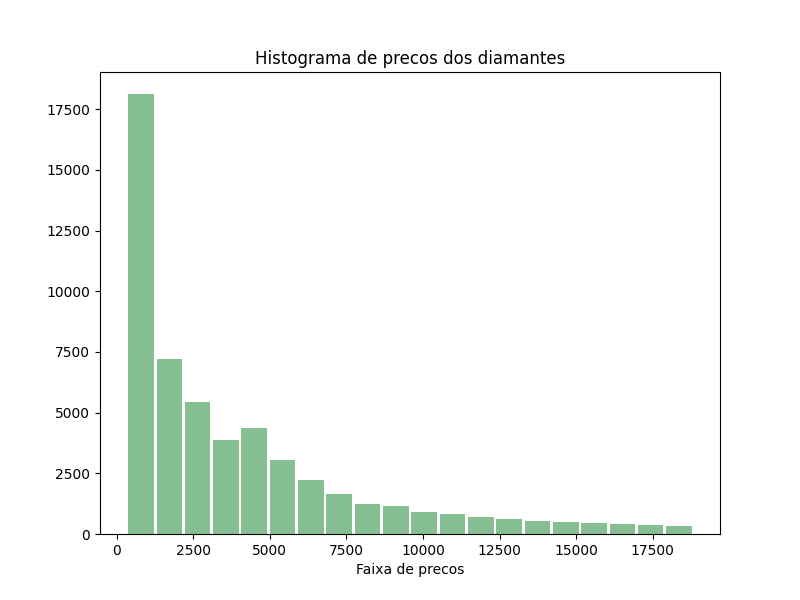

In [ ]:
%matplot plt

#### Análise de preços em função da classe de Cor

In [ ]:
# Média de preços dos diamantes por classe de Cor
mean_price_by_color = df.select('color','price').groupBy('color').agg(avg('price'))
mean_price_by_color.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------------+
|color|        avg(price)|
+-----+------------------+
|    D|3168.1064363743726|
|    G|3996.8765508684864|
|    J|  5323.81801994302|
|    H| 4480.942154736081|
|    F| 3725.080205493814|
|    I|5089.9739900387385|
|    E|3076.7524752475247|
+-----+------------------+

In [ ]:
plt.clf()
mean_price_by_color.toPandas().plot(kind='barh', x='color',y='avg(price)', color='#bc9000', legend=None, figsize=(6,6))
plt.xticks(rotation=0)
plt.title('Media de precos dos diamantes por classe de Cor')
plt.xlabel('Cor')
plt.ylabel('Preco medio')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Preco medio')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

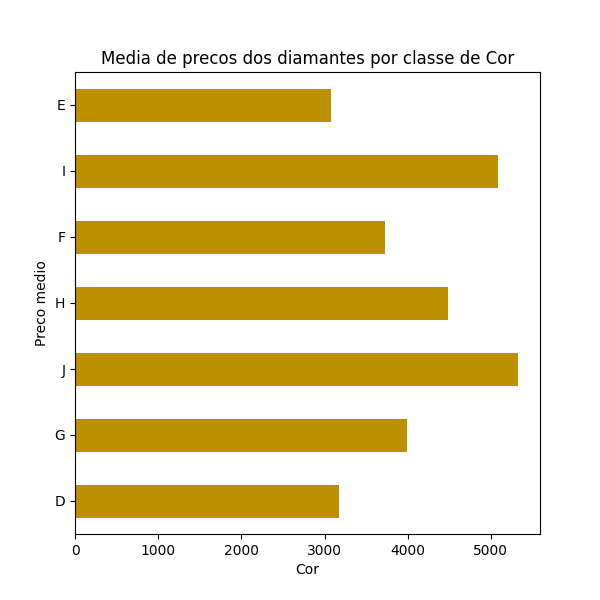

In [ ]:
%matplot plt

#### Análise de preços em função da classe de Corte

In [ ]:
# Média de preços dos diamantes por classe de Corte
mean_price_by_cut = df.select('cut','price').groupBy('cut').agg(avg('price'))
mean_price_by_cut.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+
|      cut|        avg(price)|
+---------+------------------+
|     Fair|  4357.50093225606|
|  Premium| 4579.684542815675|
|     Good|  3926.40350877193|
|    Ideal|3456.9412010395395|
|Very Good|3981.6641006539194|
+---------+------------------+

In [ ]:
plt.clf()
mean_price_by_cut.toPandas().plot(kind='barh', x='cut',y='avg(price)', color='#ac7100', legend=None, figsize=(8,6))
plt.xticks(rotation=0)
plt.title('Media de precos dos diamantes por classe de Corte')
plt.xlabel('Preco medio')
plt.ylabel('')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, '')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

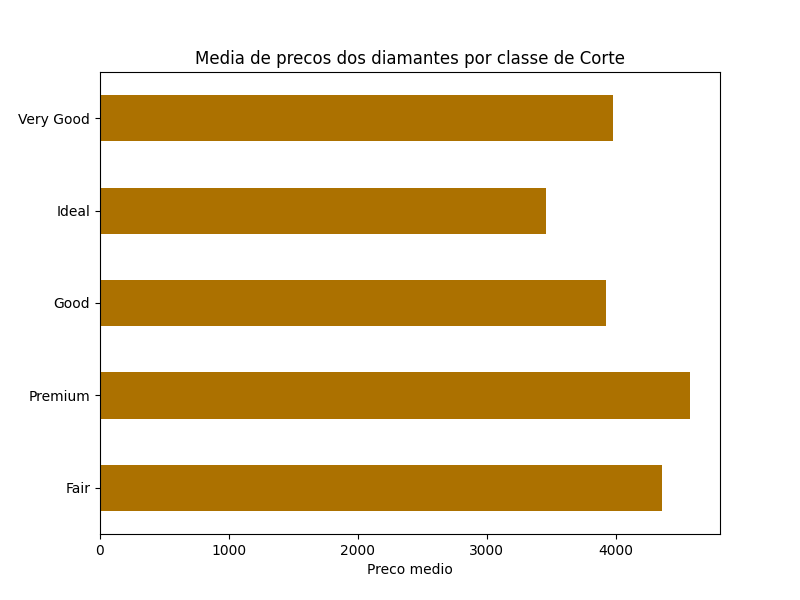

In [ ]:
%matplot plt

In [ ]:
# Qtd. de amostras por tipo de corte
plt.clf()
qtd_by_cut = df.groupBy('cut').count().toPandas()
qtd_by_cut.plot(kind='bar', x='cut',y='count', color='#bc5000', legend=None, figsize=(8,6))
plt.xticks(rotation=0)
plt.title('Qtd. de amostras por tipo de corte')
plt.xlabel('Tipo de Corte')
plt.ylabel('Qtd. Amostras')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Qtd. Amostras')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

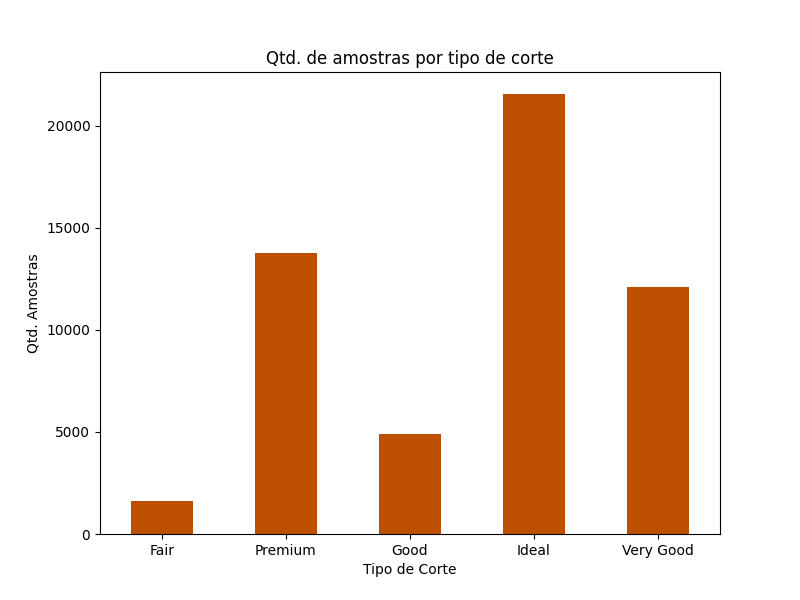

In [ ]:
%matplot plt

Nota-se que há maior quantidade de amostras com o corte do tipo "Ideal".
A média de preços para esse tipo corte coincidentemente é a menor dentre as categorias de corte.

Vamos analisar a distribuição de preços por tipo de corte.

In [ ]:
# Cortes vs. Preço

prices_by_cut = df.select('cut','price').groupBy('cut').agg(collect_list('price').alias('price')).toPandas().set_index('cut')
medians = df.select('cut','price').groupBy('cut').agg(percentile_approx("price", 0.5).alias("mediana")).toPandas().set_index('cut')
labels = prices_by_cut.index
plt.clf()
fig, ax = plt.subplots()
ax.violinplot(prices_by_cut.price)
ax.scatter(np.arange(1, len(medians) + 1), medians.mediana, marker='o', color='red', s=30, zorder=3)
ax.set_xticks(np.arange(1, len(labels)+1), labels=labels)
plt.xlabel('Tipo de Corte')
plt.ylabel('Preco')
ax.set_title('Distribuicao do preco em funcao do tipo de Corte')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Distribuicao do preco em funcao do tipo de Corte')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

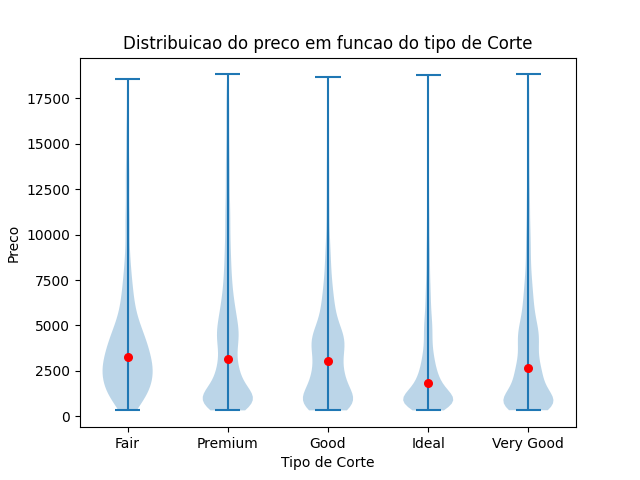

In [ ]:
%matplot plt

Nota-se que a mediana dos preços dos diamantes por tipo de corte orbitam entre ~2600 a ~3500, sendo que para a categoria de corte "Ideal" a mediana de preços é < 2000

#### Análise dos quilates em função da classe de Corte

In [ ]:
# Cria uma VIEW temporária para o conjunto de dados
df.createOrReplaceTempView('diamond_table')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Quilate médio por tipo de Corte
df_quilates = spark.sql('SELECT \
                            avg(carat) as quilate_medio \
                            ,cut \
                        FROM diamond_table \
                        GROUP BY cut\
                        ORDER BY quilate_medio DESC')
df_quilates.collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(quilate_medio=1.0460783050825613, cut='Fair'), Row(quilate_medio=0.8914085614739637, cut='Premium'), Row(quilate_medio=0.8487107268690771, cut='Good'), Row(quilate_medio=0.806365364643677, cut='Very Good'), Row(quilate_medio=0.7027594195680559, cut='Ideal')]

In [ ]:
# Quilate mediano por tipo de Corte
df_quilates = spark.sql('\
    WITH ordered_carats as (\
      SELECT\
          cut,\
          carat,\
          row_number() over (partition by cut order by carat) as row_id,\
          count(*) over (partition by cut) AS Cnt\
      FROM diamond_table\
    )\
    SELECT cut, carat as quilate_mediano\
    FROM ordered_carats\
    WHERE row_id = Cnt / 2 + 1')

df_quilates.collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(cut='Good', quilate_mediano=0.8199999928474426), Row(cut='Ideal', quilate_mediano=0.5400000214576721), Row(cut='Premium', quilate_mediano=0.8600000143051147)]

In [ ]:
carat_by_cut = df.select('cut','carat').groupBy('cut').agg(collect_list('carat').alias('carat')).toPandas().set_index('cut')

labels = carat_by_cut.index
plt.clf()
fig, ax = plt.subplots()
ax.boxplot(carat_by_cut.carat, patch_artist=True, boxprops=dict(facecolor='#FEDE00', color='k'),)
ax.set_xticks(np.arange(1, len(labels)+1), labels=labels)
plt.xlabel('Tipo de Corte')
plt.ylabel('Quilate')
ax.set_title('Distribuicao do quilate em funcao do tipo de Corte')



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Distribuicao do quilate em funcao do tipo de Corte')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

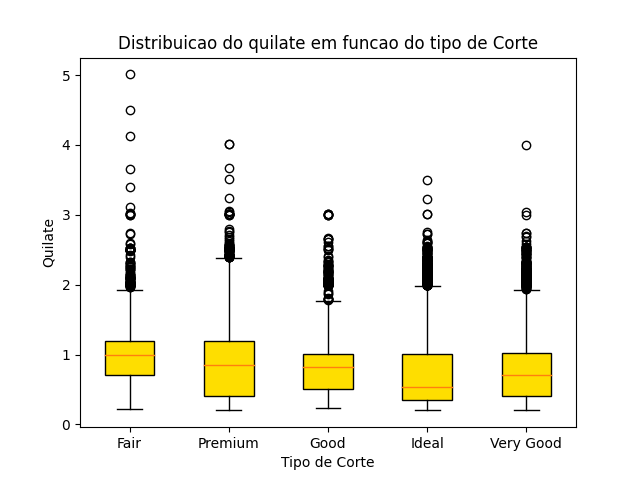

In [ ]:
%matplot plt

 Todos os diamantes Good, Very Good e Ideal pesam menos de 1 quilate com a mediana <1. Existem poucos diamantes de corte Fair e Premium em que o peso é ligeiramente superior a 1 quilate, mas a média ainda é <= 1 quilate. O corte Premium tem a faixa mais alta entre o 1º e o 3º quartil. Os diamantes maiores geralmente têm corte Fair.

#### Quilate em função do preço e da classe de cor

In [ ]:
from matplotlib.lines import Line2D  # for legend handle

carat_by_price = df.select('color','carat', 'price').toPandas()
plt.clf()
fig, ax = plt.subplots(figsize=(8, 6))
colors = {'D':'tab:blue', 'E':'tab:orange', 'F':'tab:green', 'G':'tab:red', 'H':'tab:purple', 'I':'tab:grey', 'J':'tab:olive'}
ax.scatter(carat_by_price['carat'], carat_by_price['price'], s=5, c=carat_by_price['color'].map(colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=5) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel('Quilate')
plt.ylabel('Preco')
ax.set_title('Quilate em funcao do preco e da classe de Cor')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Quilate em funcao do preco e da classe de Cor')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

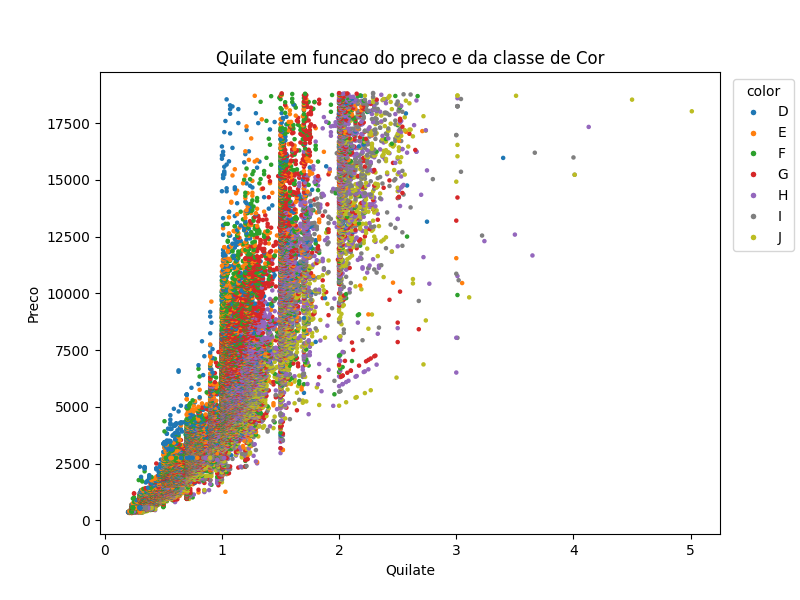

In [ ]:
%matplot plt

O gráfico de dispersão mostra uma forte correlação positiva entre o quilate e o preço. O diamante de baixo quilate denotado no eixo x é mais observado. É claro que os diamantes de quilates mais baixos têm preços mais baixos. À medida que o tamanho do quilate aumenta, vemos o aumento do preço do diamante.
A terceira dimensão mostra a cor do diamante. G é a cor mais popular, seguida por E, F, H, D, I e J. Existem algumas exceções para alto quilate e alto preço explicadas pelo fato de que alguns diamantes podem ser cortados para retenção de peso e não para beleza. Quando mais diamantes brutos são cortados, podemos assumir que a perda de quilates é compensada pelo preço mais alto.

### Exemplos simplificados de Regressão

In [36]:
import six

for i in df.columns:
    if not( isinstance(df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlacao de PRICE com", i, df.stat.corr('price',i))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Correlacao de PRICE com carat 0.9215920632569364
Correlacao de PRICE com depth -0.010728925474279557
Correlacao de PRICE com table 0.12724530490915534
Correlacao de PRICE com price 1.0
Correlacao de PRICE com x 0.8872313734512551
Correlacao de PRICE com y 0.8678642446687833
Correlacao de PRICE com z 0.8682064043973853

In [42]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['carat', 'depth', 'table', 'x', 'y', 'z'], outputCol = 'features')
vdiamonds_df = vectorAssembler.transform(df)
vdiamonds_df = vdiamonds_df.select(['features', 'price'])
vdiamonds_df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            features|price|
+--------------------+-----+
|[0.23000000417232...|326.0|
|[0.20999999344348...|326.0|
|[0.23000000417232...|327.0|
+--------------------+-----+
only showing top 3 rows

In [43]:
splits = vdiamonds_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Regressão Linear

In [45]:
from pyspark.ml.regression import LinearRegression


lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coeficientes: " + str(lr_model.coefficients))
print("Intercepto: " + str(lr_model.intercept))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Coeficientes: [8522.196403162614,-237.85581799517604,-131.06330820452408,-67.88624515933954,-159.6093338583446,-254.04686348001417]
Intercepto: 21544.18915111917

In [47]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RMSE: 1511.752895
r2: 0.854274

In [48]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","price","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
print("R Squared (R2) nos dados de teste = %g" % lr_evaluator.evaluate(lr_predictions))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+--------------------+
|         prediction|price|            features|
+-------------------+-----+--------------------+
|  380.9054887190978|367.0|[0.20000000298023...|
| -523.7146454144495|367.0|[0.20000000298023...|
| -534.2363473805635|367.0|[0.20000000298023...|
| -468.4554173880424|367.0|[0.20000000298023...|
|-311.29006976779056|386.0|[0.20999999344348...|
+-------------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) nos dados de teste = 0.854857

In [68]:
test_pd = test_df.toPandas()
x_test = np.array([x[0] for x in test_pd['features']])
y_test = test_pd['price']
y_pred = lr_predictions.select('prediction').toPandas()
plt.clf()
plt.plot(x_test, y_test, 'o', markersize=2, label="data points", color="skyblue");
plt.plot(x_test, y_pred, 'r--', linewidth=1, label="Reta de regressao");
plt.legend()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

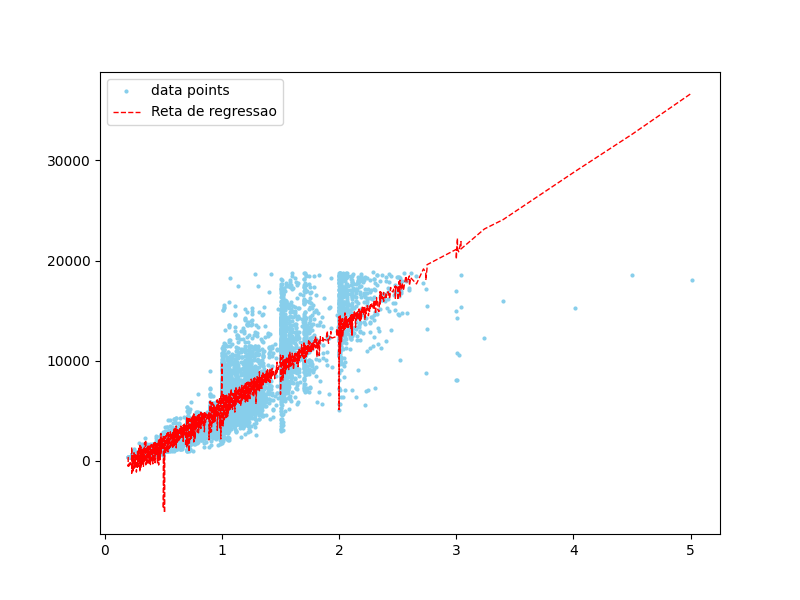

In [69]:
%matplot plt

In [71]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % test_result.rootMeanSquaredError)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Root Mean Squared Error (RMSE) nos dados de teste = 1542.68

#### Decision Tree

In [72]:
from pyspark.ml.regression import DecisionTreeRegressor


dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % rmse)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Root Mean Squared Error (RMSE) nos dados de teste = 1409.92

In [73]:
dt_model.featureImportances

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparseVector(6, {0: 0.7396, 1: 0.0017, 2: 0.0023, 3: 0.0006, 4: 0.2545, 5: 0.0013})

In [78]:
df.take(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(carat=0.23000000417232513, cut='Ideal', color='E', clarity='SI2', depth=61.5, table=55.0, price=326.0, x=3.950000047683716, y=3.9800000190734863, z=2.430000066757202)]

> Aparentemente, o quilate é a feature mais importante para predizer o preço dos diamantes do dataset.

#### Gradient-Boosted Tree

In [79]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'price', 'features').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+--------------------+
|       prediction|price|            features|
+-----------------+-----+--------------------+
|612.2403281421074|367.0|[0.20000000298023...|
|520.9881126305963|367.0|[0.20000000298023...|
|520.9881126305963|367.0|[0.20000000298023...|
|603.0959337479193|367.0|[0.20000000298023...|
| 506.101376250618|386.0|[0.20999999344348...|
+-----------------+-----+--------------------+
only showing top 5 rows

In [80]:
gbt_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % rmse)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Root Mean Squared Error (RMSE) nos dados de teste = 1377.94

> Gradient-boosted tree regression performou melhor no dataset em questão.

***
## Cleanup

Por último, utilizei os comandos `uninstall_package` da API PySpark para remover as bibliotecas `pandas` e `matplotlib` que foram inicialmente instaladas usando o comando `install_package` da referid API.

In [ ]:
sc.uninstall_package("pandas")
sc.uninstall_package("matplotlib")

In [ ]:
sc.list_packages()